##  **분류모델 알아보기-펭귄의 성별 예측**

- 펭귄의 신체 정보를 통해 성별 예측

## <font color=green>**[ 데이터 준비하기 ]**

### **STEP 1 : 라이브러리 가져오기**

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### **STEP 2 : 데이터 읽기 및 정보 파악하기**

**1) 파일 읽어 저장하기**
* data 폴더 하위에 있는 penguins_size.csv 파일을 읽어 df에 저장 후 내용을 출력한다.

In [62]:
#코드작성

df = pd.read_csv("./data/penguins_size.csv")
df.head()

,species,island,culmen_length,culmen_depth,flipper_length,body_mass,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


**[ 데이터 특성 ]**  

| 열인덱스 |  컬럼명   | 설명 및 단위 |
|----------|-----------|--------------|
|    0     | species   | 펭귄의 종 |
|   1      | island    | 펭귄의 데이터 측정 섬  |
|   2      | culmen_length  | 펭귄의 부리 길이, mm |
|   3      | culmen_depth | 펭귄의 부리 깊이, mm |
|   4      | flipper_length| 펭귄의 지느러미 길이, mm |
|   5      | body_mass  | 펭귄의 무게, g |
|   6      | sex        | 성별  |

- target으로 쓸 수 있는거: 종, 사는 섬, 성별


**2) 데이터 정보 파악하기**
* 데이터 정보를 파악한다.

In [63]:
#코드작성
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   species         344 non-null    object 
 1   island          344 non-null    object 
 2   culmen_length   342 non-null    float64
 3   culmen_depth    342 non-null    float64
 4   flipper_length  342 non-null    float64
 5   body_mass       342 non-null    float64
 6   sex             333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


• 펭귄의 수컷과 암컷의 데이터 균형을 확인하기 위해 데이터의 ‘sex’ 컬럼의 레이블 개 수를 확인해보고 그래프로 출력한다.

In [64]:
#코드작성

df["sex"].value_counts()

MALE      168
FEMALE    165
Name: sex, dtype: int64

<Axes: >

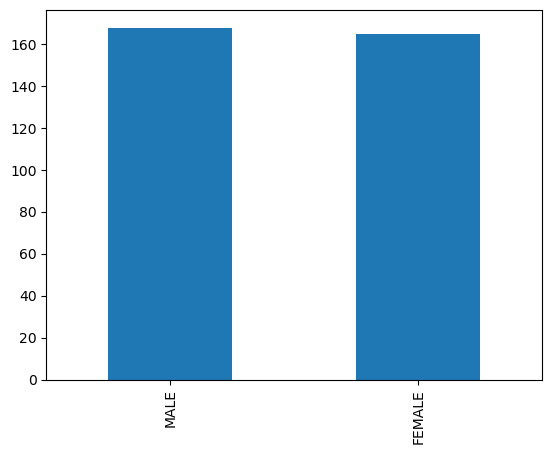

In [65]:
#코드작성
df["sex"].value_counts().plot.bar()

**3) 데이터 처리**

- **데이터에 결측치가 있는지 확인하고, 결측치를 삭제한다.**

In [66]:
# 결측치 확인 - 코드작성
df.isnull().sum()

species            0
island             0
culmen_length      2
culmen_depth       2
flipper_length     2
body_mass          2
sex               11
dtype: int64

In [67]:
# 결측치 삭제 - 코드작성
df = df.dropna(how="any")
df.isnull().sum()    

species           0
island            0
culmen_length     0
culmen_depth      0
flipper_length    0
body_mass         0
sex               0
dtype: int64

* ‘sex’컬럼의 ‘MALE’은 1로, ‘FEMALE’은 0으로 변경한다.

In [68]:
# 코드작성
df = df.replace({"MALE":1, "FEMALE":0})
#df["sex"] = df["sex"].replace({"MALE":1, "FEMALE":0})

df.head()

,species,island,culmen_length,culmen_depth,flipper_length,body_mass,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,1


### **STEP 3 : 기계학습 구현 준비**

**1) 특성/타켓 속성 지정하기**

* ‘culmen_length’, ‘culmen_depth’, ‘flipper_length’, ‘body_mass’를 특성으로   ‘sex'를 타겟 항목으로 지정한다.




In [69]:
#코드작성

X = df[['culmen_length', 'culmen_depth', 'flipper_length', 'body_mass']]
#X = df.drop(colums=['species', 'island', 'sex'])

y = df['sex']

**2) 학습/테스트 데이터 분리하기**

* train_test_split( )을 이용하여 7 :3의 비율로 학습 데이터셋(train set)과 테스트 데이 터셋(test set)으로 분리한 후 데이터의 모양을 확인한다.



In [70]:
#코드작성

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [71]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(233, 4)
(100, 4)
(233,)
(100,)


## <font color=green>**[ 기계학습 분류 모델 구현하기 ]**

### **STEP 1 : 라이브러리 가져오기**
* 사이킷런(scikit-learn) 라이브러리의 분류 알고리즘 KNeighborsClassifier 분류기 와 평가 관련 라이브러리를 가져온다.

In [72]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

### **STEP 2 : 모델 객체 생성 및 학습하기**  


**1) 모델 객체 생성하기**

* KNeighborsClassifier( ) 모델 객체 ‘model_knn‘을 생성한다.

In [73]:
#코드작성
model_knn = KNeighborsClassifier()

**2) 모델 학습하기**
* 학습 데이터셋(X_train, y_train)으로 모델(model_knn)을 학습(fit)을 한다.

In [74]:
#코드작성
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

### **STEP 3 : 모델 예측 및 평가하기**  

**1) 모델 예측하기**
* 학습된 모델을 사용하여 테스트 데이터셋(X_test)에 대한 예측값을 y_pred에 저장한다.

In [75]:
#코드작성
y_pred = model_knn.predict(X_test)

In [76]:
y_pred

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1], dtype=int64)


* 테스트 데이터 레이블값(y_test)과 예측한 값(y_pred)을 항목으로 저장한 결과(df_ result)를 출력한다.

In [77]:
#코드작성

df_result = pd.DataFrame(columns=["Actual", "Predicted"])
df_result["Actual"] = y_test
df_result["Predicted"] = y_pred

df_result

,Actual,Predicted
30,0,0
317,0,0
79,1,1
201,0,0
63,1,1
...,...,...
20,0,0
7,1,0
215,1,1
99,1,1


**2) 모델 성능 평가**
* X_test, y_test로 생성한 모델(model_knn)의 정확도를 평가한다.

In [78]:
#코드작성

print("정확도: ", model_knn.score(X_test, y_test))

정확도:  0.83


* 혼동 행렬을 이용하여 모델이 예측한 값(y_pred)이 실제값(y_test)을 얼마나 정확히 예측했는지 확인한다.

In [81]:
#코드작성
df_matrix = confusion_matrix(y_test, y_pred)
df_conf = pd.DataFrame(df_matrix).rename(index={0:'실제값(N)', 1:'실제값(P)'},
                               columns ={0:'예측값(N)', 1:'예측값(P)'})
df_conf

,예측값(N),예측값(P)
실제값(N),38,10
실제값(P),7,45


*  입력된 데이터(y_test) 중 정확히 예측한 데이터(y_pred)의 정확도(accuracy), 정밀도 (precision), 재현율(recall), F1 점수(F1-score)를 확인한다.

In [82]:
accuracy_score, precision_score, recall_score, f1_score

print("정확도: ", accuracy_score(y_test, y_pred)     )
print("정밀도: ", precision_score(y_test, y_pred)     )
print("재현율: ", recall_score(y_test, y_pred)     )
print("F1-Score: ", f1_score(y_test, y_pred)   )

정확도:  0.83
정밀도:  0.8181818181818182
재현율:  0.8653846153846154
F1-Score:  0.8411214953271028


*  scikitlearn의 metrics 라이브러리에서 제공하는 classification_report로 평가 지표 를 모두 확인해본다.

In [86]:
#코드작성
print(classification_report(y_test, y_pred))


'''
위의 두줄은 기준에 따라서 값이 변할 수 있다는 표현
'''

              precision    recall  f1-score   support

           0       0.84      0.79      0.82        48
           1       0.82      0.87      0.84        52

    accuracy                           0.83       100
   macro avg       0.83      0.83      0.83       100
weighted avg       0.83      0.83      0.83       100



'\n위의 두줄은 기준에 따라서 값이 변할 수 있다는 표현\n'

Text(50.722222222222214, 0.5, 'Actual')

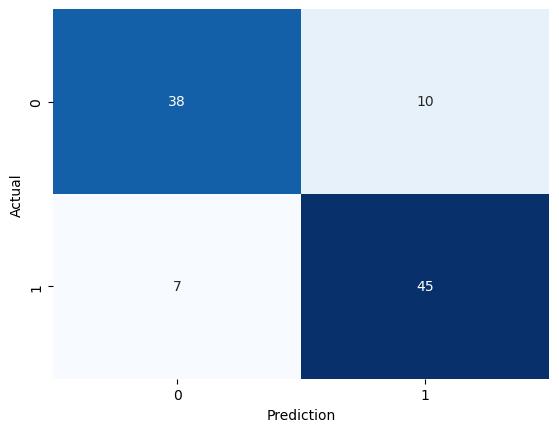

In [87]:
import seaborn as sns

ax = sns.heatmap(df_matrix,annot=True,fmt='d',cbar=False,cmap='Blues')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")